In [1]:
%matplotlib inline

# Artificial Neural Networks
This Artificial Neural Network(ANN) is composed of an input of 784 greyscale ratings from 0-255 representing each of the pixels in the 28x28 image. The 28x28 array representing the image is linearized to an array of length 784. This gets passed through two layers of 512 neurons each, to get an output of ten nodes, with only one activating to resprent the answer from 0-9. 100 epochs were used for training on 3900 of the 6500 data points to achieve a testing accuracy of 96.12%.

## Import Dependencies
We begin by importing the required packages.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


## Load the Data

In [3]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
X_raw = np.load('./data/images.npy')
y_raw = np.load('./data/labels.npy')
y_test = y_raw[4875:6500]
# print("X_train original shape", X_train.shape)
# print("y_train original shape", y_train.shape)
print("X_train original shape:", X_raw.shape)
print("y_train original shape:", y_raw.shape)

X_train original shape: (6500, 28, 28)
y_train original shape: (6500,)


### Print Out Example Data


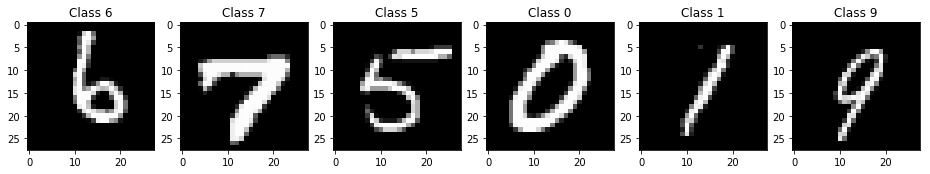

In [4]:
num_figures = 6
plt.figure(figsize=(16,8))
for i in range(num_figures):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_raw[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_raw[i]))

## Reshape The Data

In [5]:
X_train = X_raw[0:3900].reshape(3900, 784)
X_valid = X_raw[3900:4875].reshape(975, 784)
X_test = X_raw[4875:6500].reshape(1625, 784)

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Validation matrix shape", X_valid.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (3900, 784)
Validation matrix shape (975, 784)
Testing matrix shape (1625, 784)


In [6]:
Y_train = np_utils.to_categorical(y_raw[0:3900], nb_classes)
Y_valid = np_utils.to_categorical(y_raw[3900:4875], nb_classes)
Y_test = np_utils.to_categorical(y_raw[4875:6500], nb_classes)

## Build Our Model

In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
                           
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the Model

In [11]:
history = model.fit(X_train, Y_train,
          batch_size=128, 
          epochs=100,
          verbose=1,
          validation_data=(X_valid, Y_valid))

Train on 3900 samples, validate on 975 samples
Epoch 1/100
3900/3900 [==============================] - 1s 209us/step - loss: 5.9633e-04 - acc: 0.9997 - val_loss: 0.0736 - val_acc: 0.9879
Epoch 2/100
3900/3900 [==============================] - 1s 171us/step - loss: 0.0018 - acc: 0.9994 - val_loss: 0.0859 - val_acc: 0.9881
Epoch 3/100
3900/3900 [==============================] - 1s 170us/step - loss: 0.0033 - acc: 0.9988 - val_loss: 0.0713 - val_acc: 0.9881
Epoch 4/100
3900/3900 [==============================] - 1s 175us/step - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0612 - val_acc: 0.9893
Epoch 5/100
3900/3900 [==============================] - 1s 175us/step - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0625 - val_acc: 0.9895
Epoch 6/100
3900/3900 [==============================] - 1s 170us/step - loss: 4.9150e-04 - acc: 0.9999 - val_loss: 0.0570 - val_acc: 0.9903
Epoch 7/100
3900/3900 [==============================] - 1s 173us/step - loss: 4.9495e-04 - acc: 0.9998 - val_loss: 0.0613 

3900/3900 [==============================] - 1s 175us/step - loss: 4.1678e-04 - acc: 0.9999 - val_loss: 0.0621 - val_acc: 0.9903
Epoch 60/100
3900/3900 [==============================] - 1s 171us/step - loss: 3.8187e-04 - acc: 0.9999 - val_loss: 0.0628 - val_acc: 0.9909
Epoch 61/100
3900/3900 [==============================] - 1s 164us/step - loss: 5.2921e-04 - acc: 0.9999 - val_loss: 0.0599 - val_acc: 0.9895
Epoch 62/100
3900/3900 [==============================] - 1s 165us/step - loss: 1.6443e-04 - acc: 1.0000 - val_loss: 0.0575 - val_acc: 0.9911
Epoch 63/100
3900/3900 [==============================] - 1s 166us/step - loss: 9.5621e-05 - acc: 1.0000 - val_loss: 0.0626 - val_acc: 0.9909
Epoch 64/100
3900/3900 [==============================] - 1s 165us/step - loss: 5.4207e-04 - acc: 0.9998 - val_loss: 0.0725 - val_acc: 0.9901
Epoch 65/100
3900/3900 [==============================] - 1s 166us/step - loss: 1.6385e-04 - acc: 1.0000 - val_loss: 0.0663 - val_acc: 0.9903
Epoch 66/100
3900/3

## Generate Loss and Accuracy Graphs by Epoch

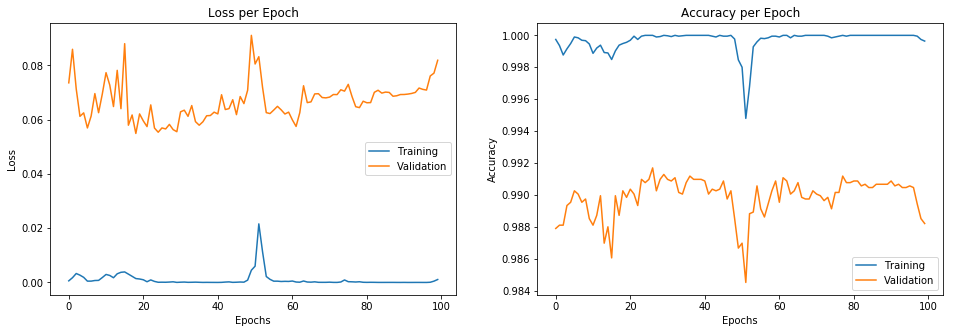

In [12]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.subplot(1,2,2)
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

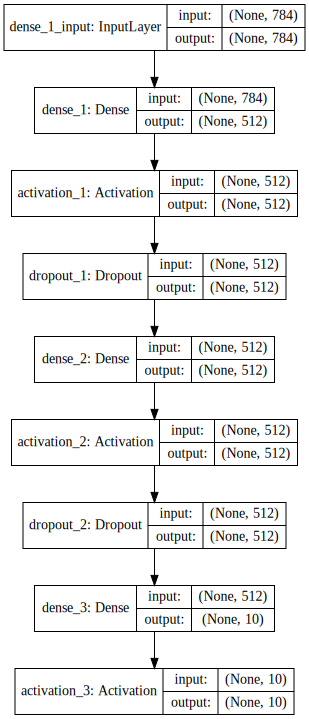

In [13]:
SVG(model_to_dot(model, show_shapes=True, rankdir='TD').create(prog='dot', format='svg'))

## Print End Result Accuracy

In [14]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

1625/1625 [==============================] - 0s 95us/step
Test score: 0.05549968258985945
Test accuracy: 0.9919384603500366


Text(0.5,1,'Confusion Matrix')

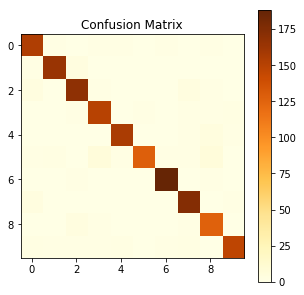

In [15]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5
cnf_matrix_dt = confusion_matrix(y_test, y_pred.argmax(axis=1))
plt.figure(figsize=(5,5))
plt.imshow(cnf_matrix_dt, cmap='YlOrBr')
plt.colorbar()
plt.title("Confusion Matrix")

## Display Correct Prediction Examples

In [16]:
predicted_classes = model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

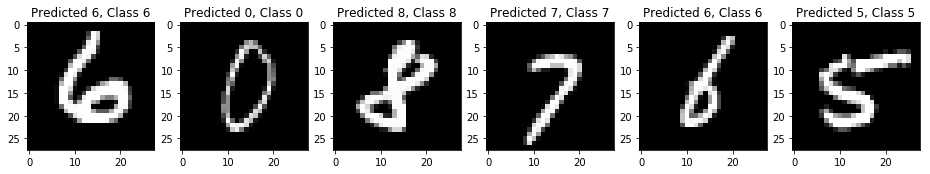

In [17]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, correct in enumerate(correct_indices[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

## Display Incorrect Prediction Examples

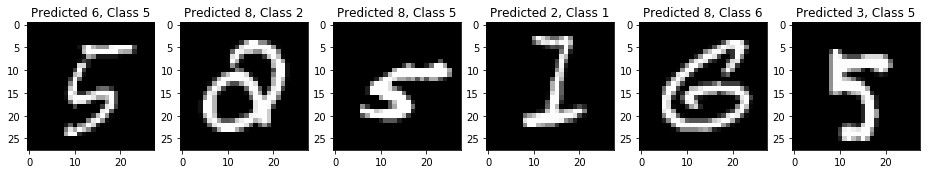

In [18]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, incorrect in enumerate(incorrect_indices[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

## Evaluation of Incorrect Prediction

Above are six examples of the algorithm incorrectly predicting certain numbers within the data given. The neural network had difficulties in determining when a curve or line was connected to another or not, and did not accurately locate smaller gaps between lines (as in the third example, where it assumed an '8' and didn't notice the small gap making it a '2'). It also had trouble recognizing less common ways to write certain numbers. It was correctly able to identify a single vertical line as being a '1', but when written as a typed '1', like in example 4, it failed. The algorithm also could not accurately identify numbers that were blurry or poorly written, as the grayscale had a harder time determining separations between lines, as is the case in the final two examples.